<a href="https://colab.research.google.com/github/Ad7amstein/Market-Price-Prediction/blob/main/Market_Price_Prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Price Prediction
A production-ready machine learning model capable of generating accurate forecasts for market quantity and prices for future months.

**Author**: Adham Allam<br>
<a href="https://www.linkedin.com/in/adham-allam/">LinkedIn<a> <a href="https://www.kaggle.com/adham3lam">Kaggle<a>

<br>


# Outline:
- [Objective](#goal)
- [Tools](#tools)
- [Data Loading and Exploring](#load_explore)
- [Data Preprocessing](#pre)

## <a name="goal">Objective<a>
The primary objective of this project is to develop a robust time series machine learning model capable of
accurately forecasting market trends based on historical data. By leveraging advanced algorithms, we aim
to predict the quantity and prices of commodities for future months, empowering stakeholders to make
proactive decisions regarding production, procurement, pricing strategies, and resource allocation.

## <a name="tools">Tools<a>
In this project, we will make use of:
- pandas, a Python library used for working with data sets
- seaborn, a Python data visualization library based on matplotlib
- Matplotlib, a popular library for plotting data
- sklearn, a simple and efficient tools for predictive data analysis

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## <a name="eda">Exploratory Data Analysis (EDA)<a>

### <a name="load_explore">Data Loading and Exploring<a>

In [53]:
# Load the data as a csv file
url = "https://raw.githubusercontent.com/Ad7amstein/Market-Price-Prediction/main/MarketPricePrediction.csv"
data = pd.read_csv(url)

In [54]:
# Output the first 5 rows
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [55]:
# Output the last 5 rows
data.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


In [56]:
# Output the shape of the data
data.shape

(10227, 10)

In [57]:
# Output useful info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [58]:
# Check for missing values
data.isnull().sum().sum()

0

 ### <a name="dstat">Descriptive Statistics<a>

In [59]:
# Get a statistical summary for numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10227.0,2009.022294,4.372841,1996.0,2006.0,2009.0,2013.0,2016.0
quantity,10227.0,76604.880023,124408.698759,20.0,8898.0,27460.0,88356.5,1639032.0
priceMin,10227.0,646.944363,673.121850,16.0,209.0,440.0,828.0,6000.0
priceMax,10227.0,1212.760731,979.658874,145.0,557.0,923.0,1527.0,8192.0
priceMod,10227.0,984.284345,818.471498,80.0,448.0,747.0,1248.0,6400.0


In [60]:
# Output the unique values in the categorical data
unq1 = data['month'].unique()
unq2 = data['market'].unique()
unq3 = data['state'].unique()
unq4 = data['city'].unique()
print(f"The unique values in (month): {unq1}\n The count of the unique values in (month): {len(unq1)}\n")
print(f"The unique values in (market): {unq2}\n The count of the unique values in (market): {len(unq2)}\n")
print(f"The unique values in (state): {unq3}\n The count of the unique values in (state): {len(unq3)}\n")
print(f"The unique values in (city): {unq4}\n The count of the unique values in (city): {len(unq4)}")

The unique values in (month): ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
 The count of the unique values in (month): 12

The unique values in (market): ['ABOHAR(PB)' 'AGRA(UP)' 'AHMEDABAD(GUJ)' 'AHMEDNAGAR(MS)' 'AJMER(RAJ)'
 'ALIGARH(UP)' 'ALWAR(RAJ)' 'AMRITSAR(PB)' 'BALLIA(UP)' 'BANGALORE'
 'BAREILLY(UP)' 'BELGAUM(KNT)' 'BHATINDA(PB)' 'BHAVNAGAR(GUJ)' 'BHOPAL'
 'BHUBNESWER(OR)' 'BIHARSHARIF(BHR)' 'BIJAPUR(KNT)' 'BIKANER(RAJ)'
 'BOMBORI(MS)' 'BURDWAN(WB)' 'CHAKAN(MS)' 'CHALLAKERE(KNT)' 'CHANDIGARH'
 'CHANDVAD(MS)' 'CHENNAI' 'CHICKBALLAPUR(KNT)' 'COIMBATORE(TN) (bellary)'
 'COIMBATORE(TN) (podisu)' 'DEESA(GUJ)' 'DEHRADOON(UTT)' 'DELHI'
 'DEORIA(UP)' 'DEVALA(MS)' 'DEWAS(MP)' 'DHAVANGERE(KNT)' 'DHULIA(MS)'
 'DINDIGUL(TN)' 'DINDIGUL(TN)(Podis' 'DINDORI(MS)' 'ETAWAH(UP)'
 'GONDAL(GUJ)' 'GORAKHPUR(UP)' 'GUWAHATI' 'HALDWANI(UTT)' 'HASSAN(KNT)'
 'HOSHIARPUR(PB)' 'HUBLI(KNT)' 'HYDERABAD' 'INDORE(MP)' 'JAIPUR'
 'JALANDHAR(PB)'

### <a name="pre">Data Preprocessing<a>

In [62]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

<ipython-input-62-1b9d74e701a2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


In [63]:
label_encoder = LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['market'] = label_encoder.fit_transform(data['market'])
data['state'] = label_encoder.fit_transform(data['state'])
data['city'] = label_encoder.fit_transform(data['city'])

In [64]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,0,0,2005,2350,404,493,446,16,0,2005-01-01
1,0,0,2006,900,487,638,563,16,0,2006-01-01
2,0,0,2010,790,1283,1592,1460,16,0,2010-01-01
3,0,0,2011,245,3067,3750,3433,16,0,2011-01-01
4,0,0,2012,1035,523,686,605,16,0,2012-01-01


In [65]:
data.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,119,11,2011,131326,282,612,526,14,116,2011-12-01
10223,119,11,2012,207066,485,1327,1136,14,116,2012-12-01
10224,119,11,2013,215883,472,1427,1177,14,116,2013-12-01
10225,119,11,2014,201077,446,1654,1456,14,116,2014-12-01
10226,119,11,2015,223315,609,1446,1126,14,116,2015-12-01


<Axes: xlabel='month'>

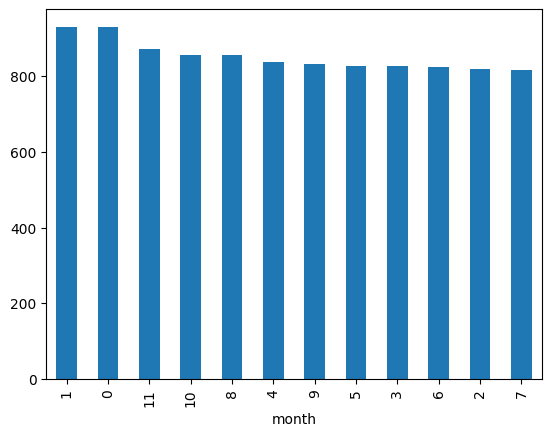

In [66]:
data['month'].value_counts().plot(kind='bar')

<Axes: xlabel='market'>

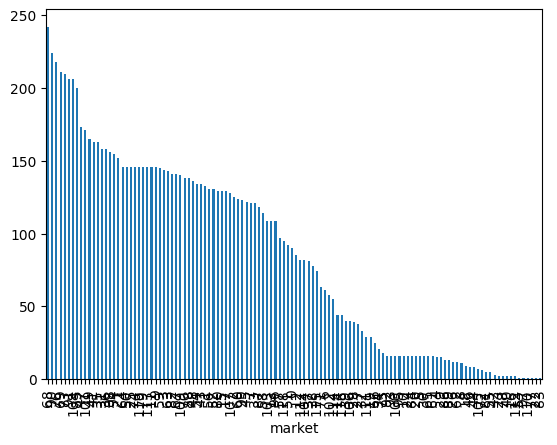

In [67]:
data['market'].value_counts().plot(kind='bar')

<Axes: xlabel='state'>

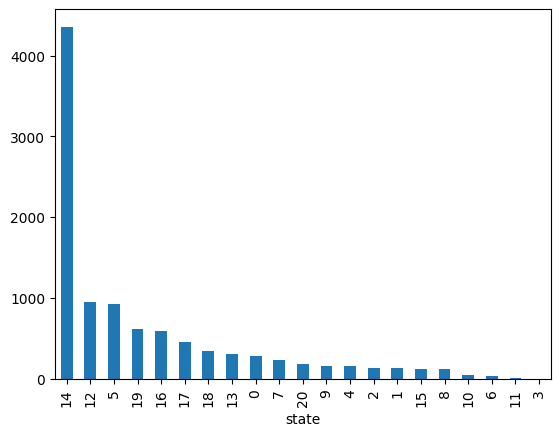

In [68]:
data['state'].value_counts().plot(kind='bar')

<Axes: xlabel='city'>

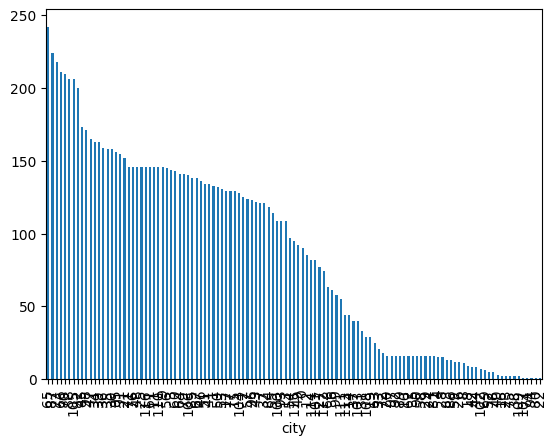

In [69]:
data['city'].value_counts().plot(kind='bar')